In [1]:
cd C:\Users\venka\OneDrive\Desktop\Driven Data\DengAI Predicting Disease Spread

C:\Users\venka\OneDrive\Desktop\Driven Data\DengAI Predicting Disease Spread


Importing libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Understanding the data

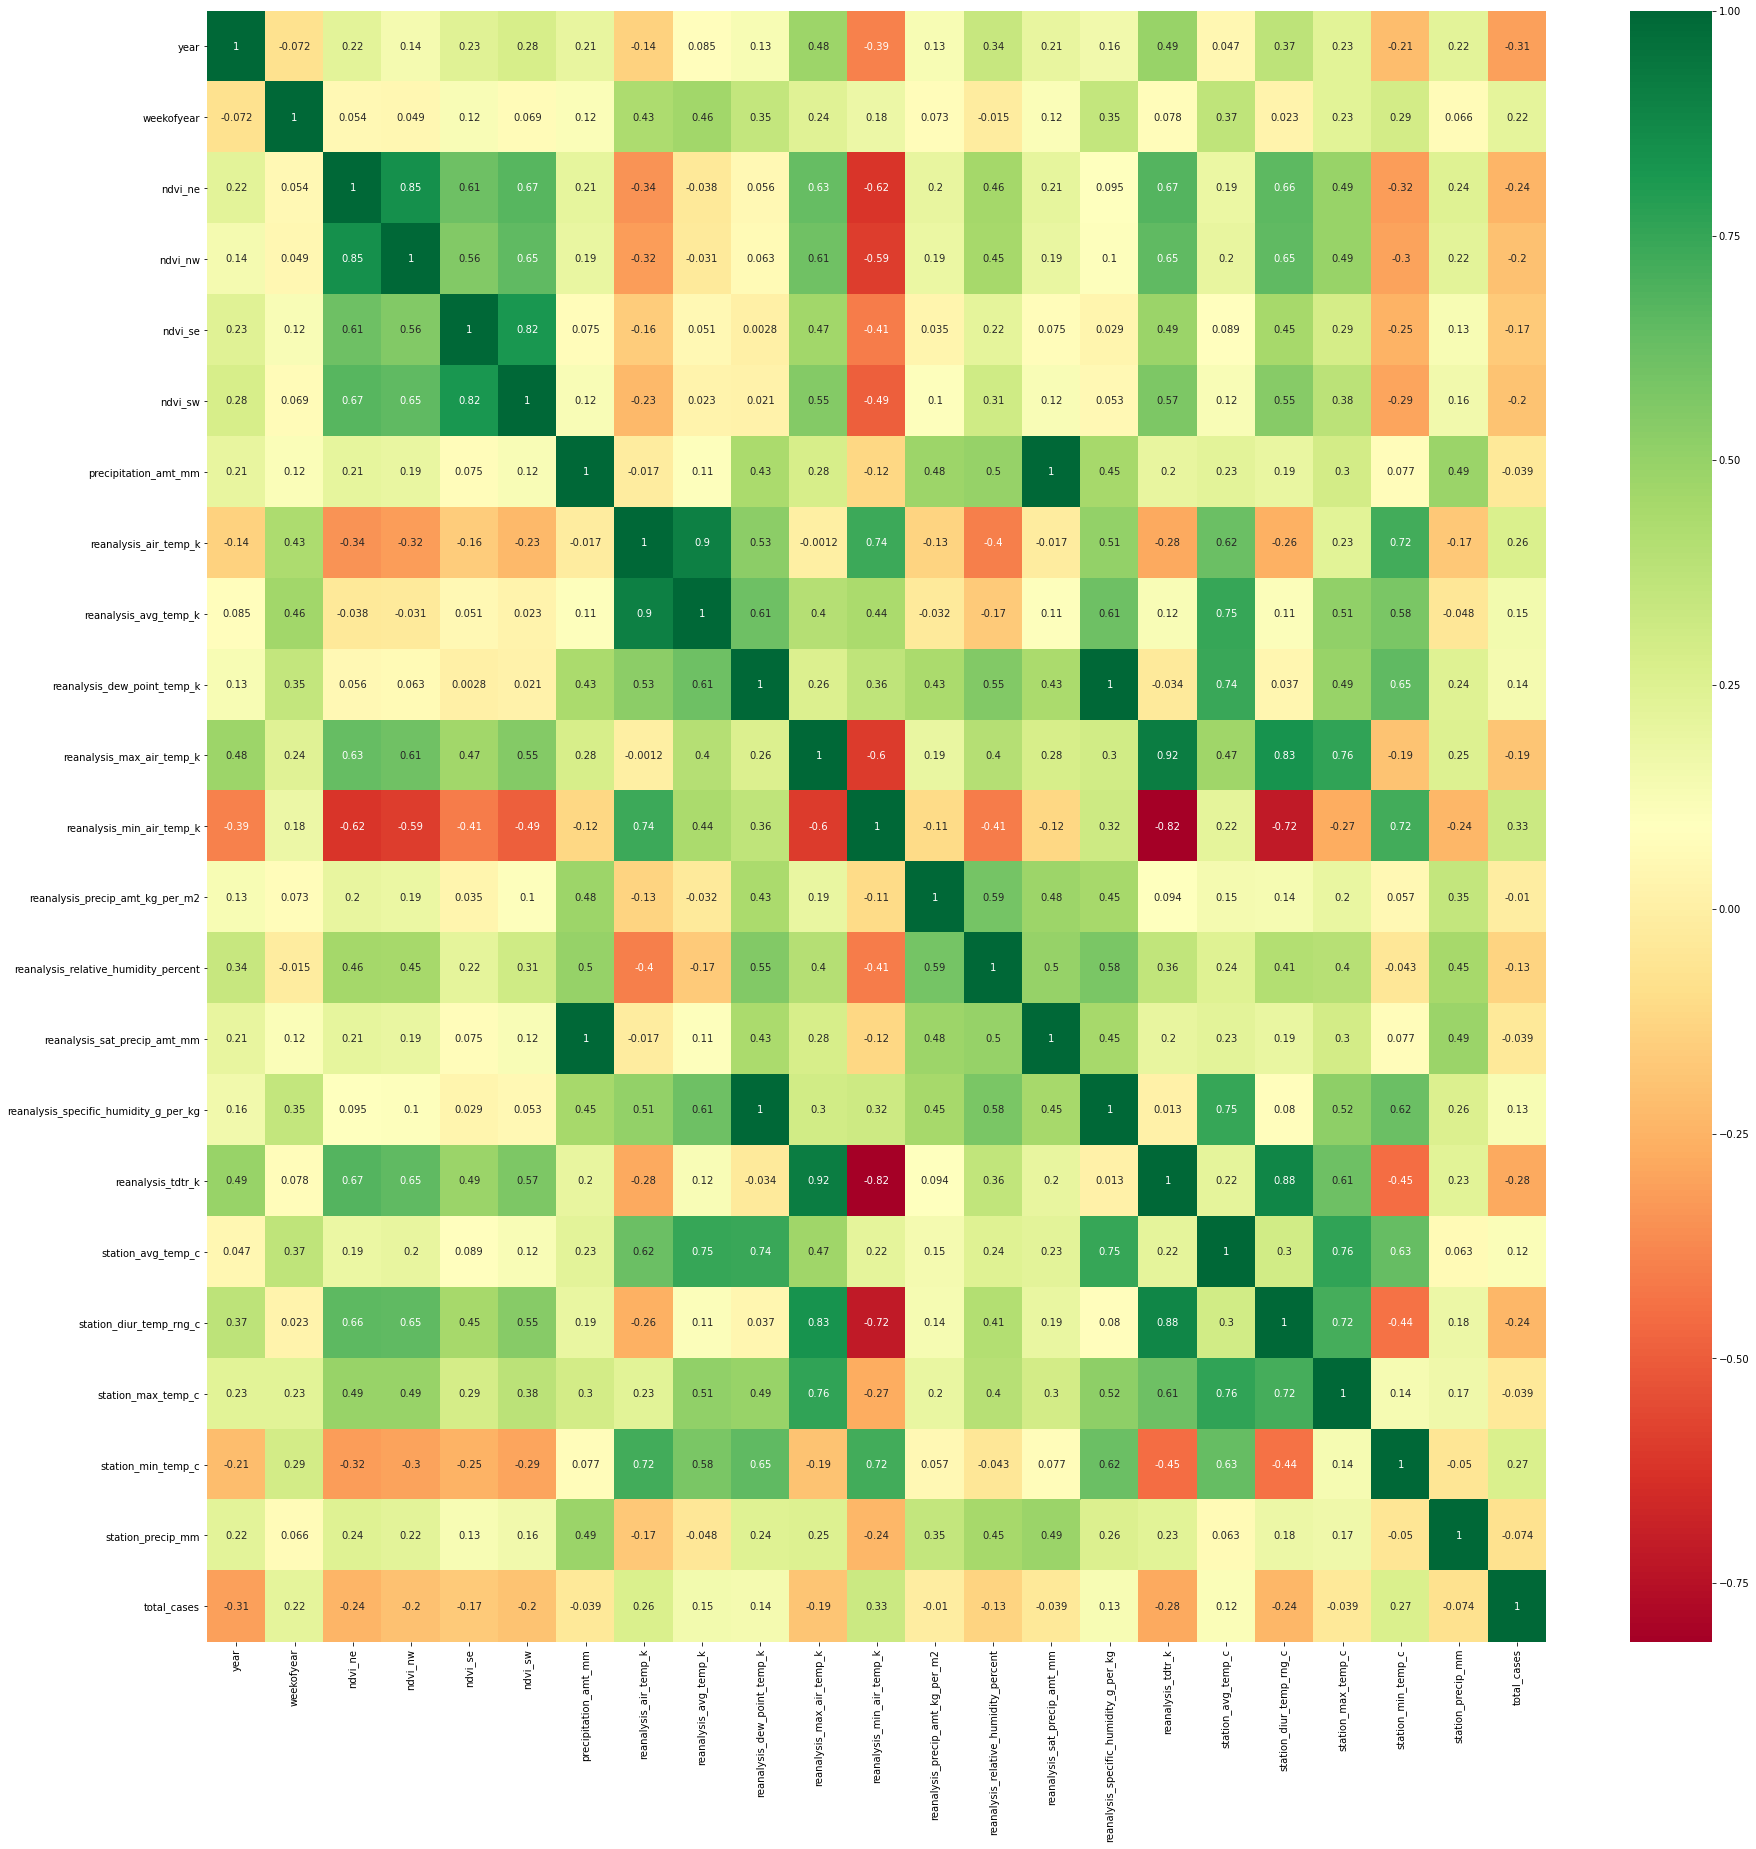

In [3]:
data=pd.read_csv('corr.csv')
X = data.iloc[:, 4:]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [4]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j]>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [5]:
corr_features=correlation(X,0.85)

In [6]:
corr_features

{'ndvi_nw',
 'reanalysis_avg_temp_k',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_diur_temp_rng_c'}

# Importing the dataset

In [8]:
dataset=pd.read_csv('dengue_features_train.csv')
X_train = dataset.iloc[:, 4:

dataset1=pd.read_csv('dengue_labels_train.csv')
y_train = dataset1.iloc[:, 3].values

dataset3=pd.read_csv('dengue_features_test.csv')
X_test = dataset3.iloc[:, 4:]

In [36]:
city = dataset3.iloc[:, 0].values
year = dataset3.iloc[:, 1].values
week_of_the_year=dataset3.iloc[:, 2].values

# Dropping the features which are highly co-related

In [10]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,ndvi_ne,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,-0.018900,0.102729,0.091200,78.60,298.492857,294.527143,301.1,296.4,25.37,78.781429,26.528571,33.3,21.7,75.2
1,-0.018000,0.082043,0.072314,12.56,298.475714,294.395714,300.8,296.7,21.83,78.230000,26.071429,30.0,22.2,34.3
2,-0.001500,0.151083,0.091529,3.66,299.455714,295.308571,302.2,296.4,4.12,78.270000,27.928571,32.8,22.8,3.0
3,NaN,0.124329,0.125686,0.00,299.690000,294.402857,303.0,296.9,2.20,73.015714,28.057143,33.3,24.4,0.3
4,0.056800,0.062267,0.075914,0.76,299.780000,294.760000,302.3,297.3,4.36,74.084286,27.614286,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,0.301471,0.280629,0.383186,41.12,297.774286,295.638571,305.5,292.7,67.60,89.990000,27.400000,32.6,21.8,33.0
412,0.247600,0.285371,0.350357,71.52,297.167143,295.845714,306.3,291.6,45.70,93.891429,27.520000,33.8,21.4,68.0
413,0.238729,0.252586,0.249771,78.96,295.831429,294.894286,304.6,290.7,45.22,94.967143,27.200000,32.6,21.6,93.2
414,0.310429,0.406614,0.403943,39.54,295.778571,293.648571,305.9,292.5,4.70,89.057143,26.700000,32.2,21.8,34.1


In [14]:
X_train=X_train.values
X_test=X_test.values

# Taking care of missing data

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X_train[:,:])
X_train[:,:] = imputer.transform(X_train[:,:])

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X_test[:, :])
X_test[:, :] = imputer.transform(X_test[:, :])

# Normalizing the data

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:,:])
X_test[:, :] = sc.transform(X_test[:,:])

# Training the model

In [22]:
from lightgbm import LGBMRegressor
RegressorLGBM = LGBMRegressor(num_leaves=50,n_estimators=100,random_state=10)
RegressorLGBM.fit(X_train, y_train)

LGBMRegressor(num_leaves=50, random_state=10)

In [34]:
from xgboost import XGBRegressor
RegressorXGB=XGBRegressor(objective ='reg:linear',n_estimators=100)
RegressorXGB.fit(X_train,y_train)

[22:25:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Predicting the values

In [38]:
predictions=RegressorLGBM.predict(X_test)
predictions = predictions.astype(int)

submission = pd.DataFrame(predictions, columns=["total_cases"])

submission.insert(0, 'city', city)
submission.insert(1, 'year', year)
submission.insert(2, 'weekofyear', week_of_the_year)
submission.reset_index()
submission.to_csv('LGBM1.csv', index = False)

In [35]:
predictions=XGBRegressor.predict(data=X_test)
predictions = predictions.astype(int)

submission = pd.DataFrame(predictions, columns=["total_cases"])

submission.insert(0, 'city', city)
submission.insert(1, 'year', year)
submission.insert(2, 'weekofyear', week_of_the_year)
submission.reset_index()
submission.to_csv('XGB.csv', index = False)

TypeError: predict() missing 1 required positional argument: 'self'

array([ 13.48312778,  10.95110238,  21.33947994,  15.97010599,
        18.54544213,  20.66462482,  16.44136983,  20.14597535,
        19.35141591,   5.69795377,  27.19819131,  47.43880683,
        34.06817279,   1.54757932,  68.12723373,  12.68541396,
        24.97777856,  66.3047204 ,  99.25540003,  53.02216565,
        62.74297171,  43.53933176,  38.06633401,  33.26674905,
        41.58232648,  17.15760491,  10.54883781,   1.17991061,
        33.93008857,   6.89254821,  33.24579366,  31.07658246,
        16.49790986,  23.29018862,   5.80755177,   9.84659002,
         6.56650952,  30.8277612 ,   8.55037134,  38.26912684,
        13.06228587,  17.529311  ,   3.3030466 ,  20.01150041,
         5.4866485 ,  17.89676171,   4.22375468,   8.52163499,
        19.60837553,  11.87077217,   9.7325417 ,  17.51289794,
        25.49662979,  14.46595797,  23.9221854 ,  30.40256286,
         4.12946189,  -4.28638176,  25.91566093,   7.22695285,
        51.59811573,  39.56806032,  57.4935746 ,  49.85